# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [229]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
data_merge_df = pd.merge(study_results, mouse_metadata, on=["Mouse ID"], how = "left")


# Display the data table for preview
data_merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [107]:
# Checking the number of mice.
mouse_count = data_merge_df["Mouse ID"].unique()

#Find how many unique mice there are
mouse_unique = data_merge_df["Mouse ID"].value_counts()

#Count unique number of mice
mouse_count = len(mouse_unique)
mouse_count

249

In [108]:
duplicate_rows = data_merge_df.loc[data_merge_df.duplicated(subset=["Mouse ID", "Timepoint"]),"Mouse ID"].unique()
duplicate_rows

array(['g989'], dtype=object)

In [109]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
duplicate_rows_2 = data_merge_df.loc[data_merge_df["Mouse ID"] == "g989"]
duplicate_rows_2



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [110]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
data_frame_new_df = data_merge_df[data_merge_df["Mouse ID"].isin(duplicate_rows)==False]
data_frame_new_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,f932,0,45.000000,0,Ketapril,Male,15,29
2,g107,0,45.000000,0,Ketapril,Female,2,29
3,a457,0,45.000000,0,Ketapril,Female,11,30
4,c819,0,45.000000,0,Ketapril,Male,21,25
...,...,...,...,...,...,...,...,...
1888,r944,45,41.581521,2,Capomulin,Male,12,25
1889,u364,45,31.023923,3,Capomulin,Male,18,17
1890,p438,45,61.433892,1,Ceftamin,Female,11,26
1891,x773,45,58.634971,4,Placebo,Female,21,30


In [111]:
# Checking the number of mice.
mouse_count_new = data_frame_new_df["Mouse ID"].unique()

#Find how many unique mice there are
mouse_unique_2 = data_frame_new_df["Mouse ID"].value_counts()

#Count unique number of mice
mouse_count_2 = len(mouse_unique_2)
mouse_count_2

248

## Summary Statistics

In [170]:
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
drug_regimen = data_frame_new_df["Drug Regimen"].unique()
drug_regimen

# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.


array(['Capomulin', 'Ketapril', 'Naftisol', 'Infubinol', 'Stelasyn',
       'Ramicane', 'Zoniferol', 'Propriva', 'Placebo', 'Ceftamin'],
      dtype=object)

In [164]:
#Group By
group_df = data_frame_new_df.groupby(["Drug Regimen"])

#Means
mean_values = group_df["Tumor Volume (mm3)"].mean()

#Medians
median_values = group_df["Tumor Volume (mm3)"].median()

#Variance
variance = group_df["Tumor Volume (mm3)"].var()

#Standard Deviation
stdev = group_df["Tumor Volume (mm3)"].std()

#SEM
sem = group_df["Tumor Volume (mm3)"].sem()


In [165]:
#Data Frame
statistics_summary = pd.DataFrame({"Mean Tumor Volume": mean_values,
                                 "Median Tumor Volume": median_values,
                                  "Tumor Volume Variance": variance,
                                  "Tumor Volume Std. Dev": stdev,
                                  "Tumor Volume Std. Err.": sem})

statistics_summary

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [166]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

#I tried but kept getting errors. Sorry!

## Bar and Pie Charts

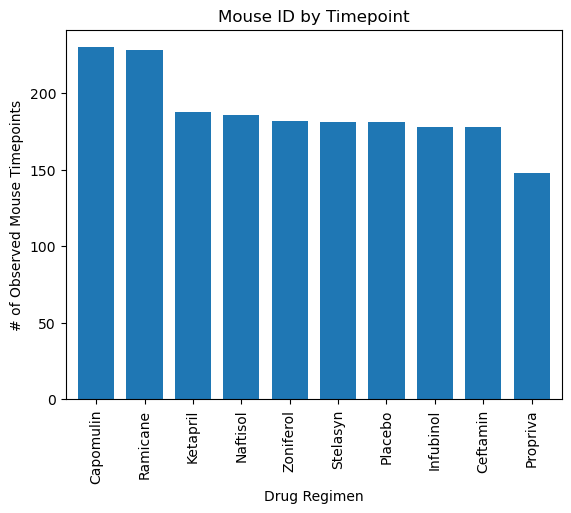

In [185]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) 

#Count up items per drug
drug_regimen_counts = data_frame_new_df["Drug Regimen"].value_counts()

#Box plot
drug_regimen_counts.plot(kind="bar", width = 0.75)

#Labels
plt.title("Mouse ID by Timepoint")
plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")

plt.show()

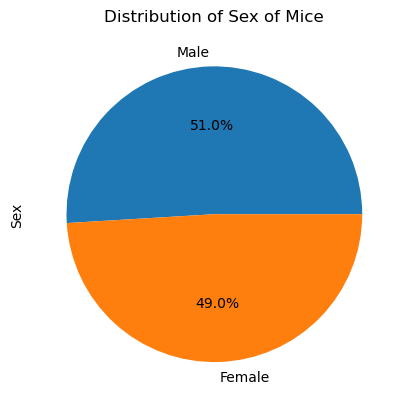

In [203]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas

#Count up items per gender
gender_counts = data_frame_new_df["Sex"].value_counts()

#Plot
gender_counts.plot(kind="pie", ylabel="Sex", autopct="%1.1f%%", title="Distribution of Sex of Mice")

plt.show()

## Quartiles, Outliers and Boxplots

In [243]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_values = data_frame_new_df.groupby(["Mouse ID"])["Timepoint"].max()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
new_merge_df = pd.merge(greatest_values, data_frame_new_df, on=("Mouse ID", "Timepoint"), how = "left")

new_merge_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


## Instructor Thoughts

In [280]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

volume_data_2 = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes

     
for treatment in treatments_list:
    variable = new_merge_df.loc[new_merge_df["Drug Regimen"]==treatment,"Tumor Volume (mm3)"]
    volume_data_2.append(variable)
            
volume_data_2





[19     38.982878
 24     38.939633
 61     30.485985
 64     37.074024
 66     40.159220
 80     47.685963
 83     37.311846
 85     38.125164
 87     38.753265
 108    41.483008
 115    38.846876
 121    28.430964
 124    33.329098
 162    46.539206
 163    32.377357
 169    41.581521
 174    23.343598
 180    40.728578
 183    34.455298
 192    31.023923
 204    40.658124
 208    39.952347
 220    36.041047
 226    28.484033
 239    31.896238
 Name: Tumor Volume (mm3), dtype: float64,
 6      38.407618
 7      43.047543
 10     38.810366
 12     32.978522
 33     38.342008
 37     33.397653
 45     37.311236
 52     40.659006
 70     29.128472
 76     33.562402
 77     36.374510
 91     31.560470
 93     36.134852
 96     22.050126
 119    30.564625
 126    31.095335
 157    45.220869
 158    36.561652
 166    37.225650
 168    43.419381
 177    30.276232
 190    40.667713
 217    43.166373
 235    44.183451
 244    30.638696
 Name: Tumor Volume (mm3), dtype: float64,
 0      67.973

# My thoughts

In [324]:
# Put treatments into a list for for loop (and later for plot labels)
treatments_list = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

cap_values = []
ram_values = []
inf_values = []
cef_values = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for index, row in new_merge_df.iterrows():
    if row["Drug Regimen"] == "Capomulin":
        cap_values.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"] == "Ramicane":
        ram_values.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"] == "Infubinol":
        inf_values.append(row["Tumor Volume (mm3)"])
    if row["Drug Regimen"] == "Ceftamin":
        cef_values.append(row["Tumor Volume (mm3)"])

        # add subset
treatments_df = pd.DataFrame({"Capomulin": cap_values,
                             "Ramicane": ram_values,
                             "Infubinol": inf_values,
                             "Ceftamin": cef_values})





In [357]:
# Determine outliers using upper and lower bounds

#Capomulin
cap_quartiles = treatments_df["Capomulin"].quantile([.25, .5, .75])
cap_lowerq = cap_quartiles[0.25]
cap_upperq = cap_quartiles[0.75]
cap_iqr = cap_upperq - cap_lowerq
cap_lower = cap_lowerq - (1.5 * cap_iqr)
cap_upper = cap_upperq + (1.5 * cap_iqr)
cap_min = treatments_df["Capomulin"].min()
cap_max = treatments_df["Capomulin"].max()
cap_outliers = treatments_df.loc[(treatments_df['Capomulin'] < cap_lower) | (treatments_df['Capomulin'] > cap_upper)]


#Ramicane
ram_quartiles = treatments_df["Ramicane"].quantile([.25, .5, .75])
ram_lowerq = ram_quartiles[0.25]
ram_upperq = ram_quartiles[0.75]
ram_iqr = ram_upperq - ram_lowerq
ram_lower = ram_lowerq - (1.5 * ram_iqr)
ram_upper = ram_upperq + (1.5 * ram_iqr)
ram_min = treatments_df["Ramicane"].min()
ram_max = treatments_df["Ramicane"].max()
ram_outliers = treatments_df.loc[(treatments_df['Ramicane'] < ram_lower) | (treatments_df['Ramicane'] > ram_upper)]

#Infubinol
inf_quartiles = treatments_df["Infubinol"].quantile([.25, .5, .75])
inf_lowerq = inf_quartiles[0.25]
inf_upperq = inf_quartiles[0.75]
inf_iqr = inf_upperq - inf_lowerq
inf_lower = inf_lowerq - (1.5 * inf_iqr)
inf_upper = inf_upperq + (1.5 * inf_iqr)
inf_min = treatments_df["Ramicane"].min()
inf_max = treatments_df["Ramicane"].max()
inf_outliers = treatments_df.loc[(treatments_df['Infubinol'] < inf_lower) | (treatments_df['Infubinol'] > inf_upper)]

#Ceftamin
cef_quartiles = treatments_df["Ceftamin"].quantile([.25, .5, .75])
cef_lowerq = cef_quartiles[0.25]
cef_upperq = cef_quartiles[0.75]
cef_iqr = cef_upperq - inf_lowerq
cef_lower = cef_lowerq - (1.5 * cef_iqr)
cef_upper = cef_upperq + (1.5 * cef_iqr)
cef_min = treatments_df["Ceftamin"].min()
cef_max = treatments_df["Ceftamin"].max()
cef_outliers = treatments_df.loc[(treatments_df['Ceftamin'] < inf_lower) | (treatments_df['Ceftamin'] > inf_upper)]

#Don't know how to print it out the way it wants it printed out

,Capomulin,Ramicane,Infubinol,Ceftamin


In [14]:

# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)



# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


Capomulin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Ramicane's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)
Infubinol's potential outliers: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Ceftamin's potential outliers: Series([], Name: Tumor Volume (mm3), dtype: float64)


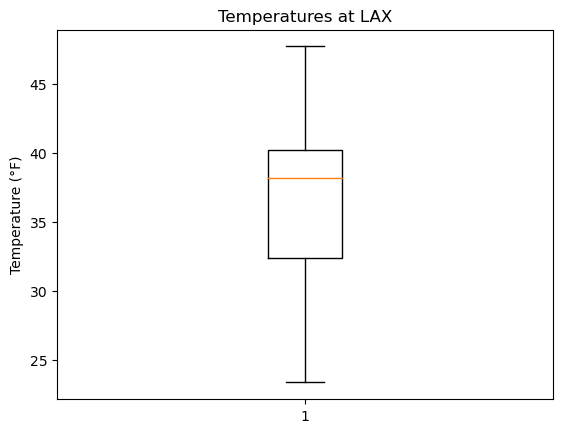

In [364]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.

#Cap Values
fig1, ax1 = plt.subplots()
ax1.set_title('Temperatures at LAX')
ax1.set_ylabel('Temperature (°F)')
ax1.boxplot(cap_values)
plt.show()

## Line and Scatter Plots

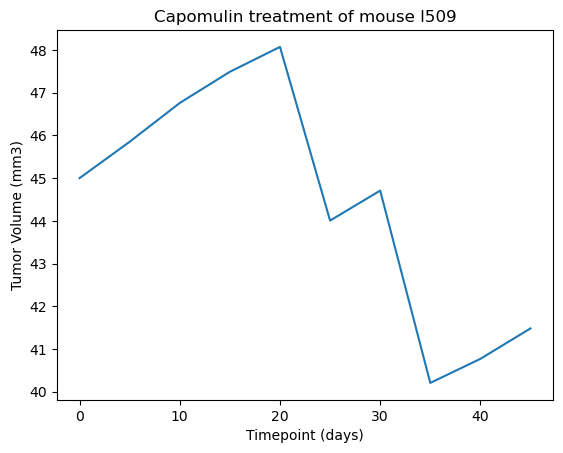

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


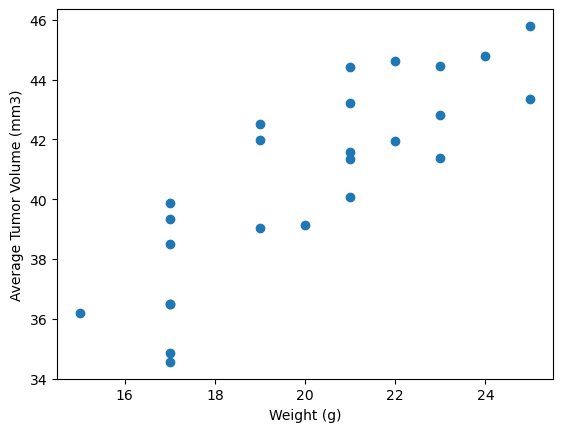

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


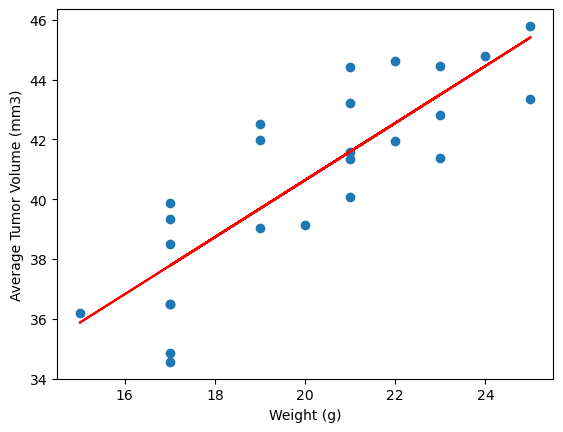

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
